# Exercises A
_Version: February 14, 2022, see_ [PyEcon.org](https://pyecon.org).

In [25]:
import numpy as np

l = [1,2,3]
min(l)

1

### Exercise 1
Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the Vandermonde matrix $V$:
$$
V = \left(\begin{array}{ccccc}
1 & v_1 & v_1^2 & \dots & v_1^{n-1}\\
1 & v_2 & v_2^2 & \dots & v_2^{n-1}\\
\vdots & \vdots & \vdots & \vdots & \vdots\\
1 & v_n & v_n^2 & \dots & v_n^{n-1}\\
\end{array} \right)
$$

In [26]:
# Enter your codes here...
import numpy as np


def vandermonde(vec):

    n = len(vec)
    mat = np.empty((n,n))

    for i in range(n):
        for j in range(n):
            mat[i,j] = vec[i]**j

    return(mat)

vandermonde(np.array([1,2,3]))

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [27]:
np.zeros((4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [28]:
np.empty(shape = (4,4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [29]:
# Ones and empty are identlical
(np.ones(shape = (4,4)) == np.empty(shape=(4,4))).all()

False

### Exercise 2

Create a function which takes a vector $v=(v_1, \dots ,v_n)$ and returns the mean and the sum of the vector.

1. Solve the task by using NumPy.
2. Solve the task without importing modules.

In [30]:
import numpy as np

def mean_sum(vec):

    sum = np.sum(vec)
    mean = np.mean(vec)

    return(mean, sum)

print(mean_sum(np.array([1,2,3])))


def mean_sum_hand(vec):

    n = len(vec)
    sum = 0

    for i in vec:
        sum += i

    mean = sum/n

    return(mean, sum)

print(mean_sum_hand(np.array([1,2,3])))


(2.0, 6)
(2.0, 6)


### Exercise 3

Use NumPy to check if the following vectors are linearly independent:

$$
v_1=
\left( \begin{array}{c} 0 \\ 1 \\ 2 \\ 1 \end{array} \right),
\ v_2=
\left( \begin{array}{c} 4 \\ 2 \\ 2 \\ 2 \end{array} \right),
\ v_3=
 \left( \begin{array}{c} 1 \\ 0 \\ 3 \\  0\end{array} \right),
\ v_4=
 \left( \begin{array}{c} 1 \\ 0 \\ 0 \\ 0 \end{array} \right).
$$

In [31]:
import numpy.linalg as nplin

# Solution 1
vec1 = np.array([0,1,2,1]).reshape((4,1))
vec2 = np.array([4,2,2,2]).reshape((4,1))
vec3 = np.array([1,0,3,0]).reshape((4,1))
vec4 = np.array([1,0,0,0]).reshape((4,1))

mat1 = np.concatenate((vec1, vec2, vec3, vec4), axis = 1)

print(f'Matrix 1:\n{mat1}\n')

# Solution 2

mat2 = np.array([[0,4,1,1],
                [1,2,0,0],
                [2,2,3,0],
                [1,2,0,0]])

print(f'Matrix 2:\n{mat2}\n')


def check_independence(mat):
    '''
    Linear independence is given is the matrix with vectors as columns has the determinant 0.
    '''
    if nplin.det(mat) == 0:
        print('The vectors are linearly independent!')
    else:
        print('The vecotrs are lienarly dependent!')

check_independence(mat1)

Matrix 1:
[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]

Matrix 2:
[[0 4 1 1]
 [1 2 0 0]
 [2 2 3 0]
 [1 2 0 0]]

The vectors are linearly independent!


### Exercise 4

Create a function which sorts the vector $v=(v_1, \dots ,v_n)$ without using the built-in `array.sort()` function and visualize the result in a graph.

Bubble sort: [  1   2   2   3   5   7  63 346]
NumPy sort:  [  1   2   2   3   5   7  63 346]


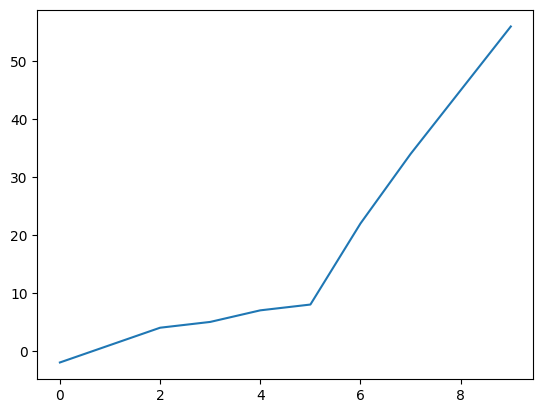

In [32]:
vec = np.array([1,2,5,3,346,7,2,63])

# Bubble sort
def bubble_sort(vec):

    n = len(vec)

    # Number of passes performed on the list#
    # In each pass, the largest element "bubbles up" to its correct position at the end of the list
    for i in range(n-1):

        # iterate over  elements that are still unsorted
        #n-1-i optimizes the algorithm, since the last i elements are already sorted
        for j in range(n-1):
            
            # Pairwise variable swap if following number is smaller
            if vec[j] > vec[j+1]:
                vec[j], vec[j+1] = vec[j+1], vec[j]
            else:
                pass
    return vec

print(f'Bubble sort: {bubble_sort(vec)}')
print(f'NumPy sort:  {np.sort(vec)}')


import matplotlib.pyplot as plt
%matplotlib inline

v = np.array([4, 7, 22, 56, 8, -2, 34, 1, 5, 45])


def bubblesort(v):

    # Range object starting from the back
    for k in range(len(v)-1, 0, -1): #range(start, stop, step)
        for i in range(k):
            if v[i] > v[i+1]:
                v[i], v[i+1] = v[i+1], v[i]
    return v


# Lineplot of sorted values
plt.plot(bubblesort(v))

### Exercise 5

Determine the intersection of the straight line $g$ and the plane $E$:

$$g: \vec{x}=\left ( \begin{array}{c} 2 \\ 3 \\ 0 \end{array} \right) +t\left ( \begin{array}{c} 1 \\ -2 \\ 2 \end{array} \right), \quad t \in \mathbb{R},$$
$$E: \vec{x}= \left ( \begin{array}{c} 9 \\ 0 \\ 0 \end{array} \right) + r\left ( \begin{array}{c} -9 \\ 4.5 \\ 0 \end{array} \right) +s\left ( \begin{array}{c} -9 \\ 0 \\ 4.5 \end{array} \right), \quad r,s\in \mathbb{R}.$$

_Hint: You might want to refresh your knowledge of the parametric form at, for example,_ https://en.wikipedia.org/wiki/Line-plane_intersection.

In [33]:
import numpy.linalg as nplin

# defining matrices
g = np.array([[2, 1],
              [3, -2],
              [0, 2]])
e = np.array([[9, -9, -9],
              [0, 4.5, 0],
              [0, 0, 4.5]])

print(g[:, 0])
print(e[:, 0])

# form system of linear equations: Ax = b
b = g[:, 0] - e[:, 0]
a = np.column_stack([-g[:, 1], e[:, 1:]])

print(f'Matrix b:\n{b}\n')
print(f'Matrix a:\n{a}')

# solve system for x
x = nplin.solve(a, b)
x

[2 3 0]
[9. 0. 0.]
Matrix b:
[-7.  3.  0.]

Matrix a:
[[-1.  -9.  -9. ]
 [ 2.   4.5  0. ]
 [-2.   0.   4.5]]


array([1.        , 0.22222222, 0.44444444])

### Exercise 6: Sorting algorithms

Sorting algorithms are algorithms that put elements of a list in a certain order. Efficient sorting is important for optimizing the efficiency of complex algorithms. There are different sorting algorithms which differ in time complexity.

1. Implement a function which uses _Bubblesort_ to sort a randomly generated list (numbers) in numerical order.
2. Implement a function which uses _Quicksort_ achieve the same goal.

_Hint: Inform yourself about the two different sorting algorithms first, for example,_
https://en.wikipedia.org/wiki/Bubble_sort _and_ https://en.wikipedia.org/wiki/Quicksort.

In [38]:
import random

np.random.seed(seed=42)

numbers = []
for i in range(100):
    numbers.append(random.randint(-10000, 10000))


def bubble_sort(lst):

    n = len(lst)

    for i in range(n-1):
        for j in range(n-i-1):
            if lst[j] > lst[j+1]:
                lst[j], lst[j+1] = lst[j+1], lst[j]
            else:
                pass
    return(lst)

print(f'Sorted array: {bubble_sort(numbers)}')

Sorted array: [-9971, -9818, -9452, -9143, -8388, -8186, -7568, -7521, -7480, -7478, -7027, -6879, -6781, -6630, -6432, -6391, -6373, -6254, -6117, -6094, -5896, -5539, -5454, -5304, -5216, -5128, -5078, -5056, -4787, -4063, -4011, -3820, -3642, -3201, -3033, -2815, -2809, -2695, -2400, -2278, -2237, -1762, -1610, -1597, -1553, -1421, -1007, -927, -839, -824, -695, -688, -480, 48, 178, 699, 791, 912, 914, 1223, 1363, 1384, 1570, 1706, 1853, 1967, 2085, 2131, 2384, 2461, 2639, 2817, 3067, 3343, 3696, 3741, 3991, 4716, 4976, 5132, 5193, 5197, 5290, 5451, 5481, 5834, 6261, 6556, 7053, 7193, 7247, 7676, 7750, 8403, 8831, 8919, 8993, 9051, 9069, 9240]


# Quicksort

1. Select the Pivot Element

There are different variations of quicksort where the pivot element is selected from different positions. Here, we will be selecting the rightmost element of the array as the pivot element.

2. Rearrange the Array

Now the elements of the array are rearranged so that elements that are smaller than the pivot are put on the left and the elements greater than the pivot are put on the right.



In [35]:
# Quicksort

def partition(numbers, low, high):
    '''
    The logic is simple, we start from the leftmost element and keep track of the index of smaller (or equal) elements as i.
    While traversing, if we find a smaller element, we swap the current element with arr[i]. Otherwise, we ignore the current element.
    '''

    # Initialize the index of the smaller element
    i = low - 1 

    # Select the pivot element (last element in the array)
    pivot = numbers[high]  

    for j in range(low, high):

        if numbers[j] <= pivot:
            i += 1
            # Swap the current element with the element at the smaller index
            numbers[i], numbers[j] = numbers[j], numbers[i]

    # Swap the pivot element with the element at the appropriate position
    numbers[i+1], numbers[high] = numbers[high], numbers[i+1]

    # Return the position of the pivot element after rearrangement
    return i + 1  


def quicksort(numbers, low, high):

    if low < high:

        # Partition the array and obtain the position of the pivot element
        p = partition(numbers, low, high)

        # Recursively sort the sub-array to the left of the pivot
        quicksort(numbers, low, p-1)

        # Recursively sort the sub-array to the right of the pivot
        quicksort(numbers, p+1, high)

    # Return the sorted array
    return numbers  

# Call the quicksort function with the initial low and high indices
# Function call
print(f'Sorted array: {(quicksort(numbers, 0, len(numbers) - 1))}')

Sorted array: [-9820, -9763, -9342, -8720, -8568, -8420, -7919, -7861, -7618, -7531, -7210, -7185, -7106, -7070, -6741, -6667, -5984, -5887, -5872, -5752, -5579, -5500, -5443, -5178, -4981, -4753, -4587, -4524, -4272, -4256, -4255, -3649, -3642, -3374, -3215, -3169, -3098, -2663, -2363, -2341, -1256, -1209, -1023, -827, -570, 10, 407, 458, 838, 842, 919, 977, 1177, 1321, 1410, 1502, 1541, 1575, 1818, 2075, 2218, 2486, 2626, 2769, 3082, 3130, 3151, 3196, 3285, 3385, 4377, 4524, 4969, 5095, 5316, 5401, 5417, 5652, 5709, 5746, 5783, 5865, 6260, 6362, 6510, 6764, 7098, 7338, 7557, 7822, 7891, 7925, 8198, 8550, 8637, 8641, 9275, 9413, 9653, 9731]


### Exercise 7: Numerical differentiation

1. Create a function which estimates the derivative of the function $f$ at the position $x=3$. You can use the simple finite difference formula:

    $$
    f'(x)=\lim_{h \rightarrow 0} \dfrac{f(x+h) - f(x)}{h}
    $$

    The derivative function in Python should take the function to be derived, the position $x$ and the distance $h$ as arguments.


2. Create a function which estimates the gradient of a scalar function $g: \mathbb{R}^{n}\rightarrow \mathbb{R}$. The arguments of the gradient function should be the function $g$, the dimension $n$, the vector $v$ where the gradient shall be estimated and the distance $h$. Check your gradient function on the given function $g$ and vector $v$.

3. Create a function which returns an approximation of the Hessian matrix $h$ of the function $g$ at $v$:
  $$
  H_{g}(v) := \left( \dfrac{\partial^{2} g}{\partial v_{i} \partial v_{j}} (v) \right)_{i, j=1, \ldots, n}
  $$
  You can use the following identity:
  $$
  \dfrac{\partial}{\partial y}\left(\dfrac{\partial g}{\partial x}\right)(v) =\lim_{h \rightarrow 0}\dfrac{\dfrac{\partial g}{\partial x}(x, y+h, z)-\dfrac{\partial g}{\partial x}(x, y, z)}{h}\\
 =\lim_{h \rightarrow 0} \dfrac{\dfrac{g(x+h,y+h,z)-g(x,y+h,z)}{h}-\dfrac{g(x+h, y, z)-g(x, y, z)}{h}}{h}\\
 =\lim_{h \rightarrow 0}\dfrac{g(x+h, y+h, z)-g(x, y+h, z)-g(x+h, y, z)+g(x, y, z)}{h^{2}}
  $$

In [54]:
import numpy as np


def f(x):
    return x**2


def g(v):
    return np.sin(v[0]) * v[1] + np.exp(v[2])

v = np.array([2., 3., 1.])

1. Derivative at position 1

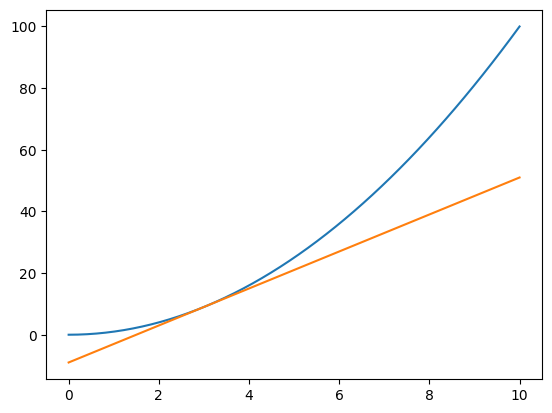

In [68]:
def derivation(f, x, h):
    return (f(x + h) - f(x)) / h

# vector of values to be calculated
vals = np.linspace(start=0, stop = 10)

df = derivation(f=f, x=vals, h=0.00001)

# plot teh quadratic function
plt.plot(vals, f(vals))

# plot the derivative
# the derivative at 3 is the slope of the function
# the intercept is the value of the quadractic function - the 
plt.plot(vals, derivation(f, 3, 0.001) * vals + (f(3) - derivation(f, 3, 0.001)*3))


2. Estimate the gradient of the scalar function g

In [69]:
# Define a function g that takes a numpy array v as input
def g(v):
    # Calculate the value of the function using elements of v
    return np.sin(v[0]) * v[1] + np.exp(v[2])

# Create a numpy array v with values [2., 3., 1.]
v = np.array([2., 3., 1.])

# Define a function gradient that calculates the numerical gradient of function g at point v using a step size h
def gradient(g, v, h):

    # Get the number of elements in v
    n = len(v)

    # Create an empty numpy array to store the gradient values
    grad = np.empty(n)

    # Iterate over each element in v
    for i in range(n):

        # Create a copy of v and add h to the i-th element
        hv = v.copy()
        hv[i] += h

        # Calculate the difference between g(hv) and g(v), and divide by h to approximate the gradient
        grad[i] = (g(hv) - g(v)) / h
        
    # Return the gradient values
    return grad

# Calculate the gradient of function g at point v with a step size of 0.001
gradient(g, v, 0.001)

array([-1.24980425,  0.90929743,  2.71964142])

3. Hessian matrix

In [ ]:
# Define a function hessian that calculates the numerical Hessian matrix
# of function g at point v using a step size h

def hessian(g, v, h):

    # Get the number of elements in v
    n = len(v)

    # Create an empty n x n numpy array to store the Hessian matrix
    hes = np.empty([n, n])

    # Iterate over each pair of elements in v
    for i in range(n):
        for j in range(n):

            # Create copies of v and modify them by adding h to the corresponding elements
            v1 = v.copy()
            v1[i] += h

            v2 = v1.copy()
            v2[j] += h
            
            v4 = v.copy()
            v4[j] += h
            # Calculate the difference between g evaluated at different v values
            # and divide by h^2 to approximate the second partial derivatives
            hes[i][j] = (g(v2) - g(v1) - g(v4) + g(v)) / (h**2)
    # Return the Hessian matrix
    return hes

# Call the hessian function with the g function, v, and a step size of 0.001
hessian(g, v, 0.001)

### Exercise 8: Numerical integration

Create a function to approximate an integral of the function $f$ in the interval $(a, b)$. You can divide the area into $n$ equal width rectangles and add these up by using the formula:
$$
\int_{a}^{b}f(x) \approx \dfrac{b-a}{n}\left(f(x_{1})+f(x_{2})+...+f(x_{n})\right)
$$
Where $x_{i}$ is given by $x_{i}=\dfrac{(b-a)}{n} \cdot i+a$.
Check your integral approximation on the given function $f$ in the interval (1,4).

In [70]:
def f(x):
    return x**3 + 2 * x**2 + 1


In [75]:
def integral_approx(f, a, b, n):

    function_vals = []

    # iterate over the number of area, we devided the integral in
    for i in range(n):

        # clacualte x value given the partition
        x_i = ((b-a)/n) * i + a
        
        # calcualte function value given the partition
        fx_i = f(x_i)

        # append funcion values to list
        function_vals.append(fx_i)

    integral = ((b-a)/n) * sum(function_vals)

    return integral

integral_approx(f=f, a=1, b=4, n=1000000)



108.74986050003822